In [17]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
clean_data = Path("Resources/clean_data.csv")
clean_data_df = pd.read_csv(clean_data)

clean_data_df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,239900,USD,239900,US,100,US,M
1,2023,SE,FT,Data Scientist,159900,USD,159900,US,100,US,M
2,2023,EN,FT,Data Analyst,162240,USD,162240,US,0,US,M
3,2023,EN,FT,Data Analyst,47840,USD,47840,US,0,US,M
4,2023,SE,FT,Data Engineer,130410,USD,130410,US,0,US,M
5,2023,SE,FT,Data Engineer,92000,USD,92000,US,0,US,M
6,2023,SE,FT,Data Science,270250,USD,270250,US,0,US,M
7,2023,SE,FT,Data Science,144000,USD,144000,US,0,US,M
8,2023,SE,FT,Business Intelligence Analyst,176875,USD,176875,US,0,US,M
9,2023,SE,FT,Business Intelligence Analyst,84750,USD,84750,US,0,US,M


In [19]:
no_remote_work_avg_sal = clean_data_df.loc[clean_data_df['remote_ratio'] == 0, 'salary_in_usd'].mean()
partial_remote_work_avg_sal = clean_data_df.loc[clean_data_df['remote_ratio'] == 50, 'salary_in_usd'].mean()
fully_remote_work_avg_sal = clean_data_df.loc[clean_data_df['remote_ratio'] == 100, 'salary_in_usd'].mean()

print(f"The average salary for data science professionals working less than 20% remote is ${round(no_remote_work_avg_sal)}.")
print(f"The average salary for data science professionals working 50% remote is ${round(partial_remote_work_avg_sal)}.")
print(f"The average salary for data science professionals working more than 80% remote is ${round(fully_remote_work_avg_sal)}.")

The average salary for data science professionals working less than 20% remote is $162559.
The average salary for data science professionals working 50% remote is $118427.
The average salary for data science professionals working more than 80% remote is $155694.


In [20]:
job_titles = set(clean_data_df['job_title'])
job_titles

{'AI Architect',
 'AI Developer',
 'AI Engineer',
 'AI Scientist',
 'AWS Data Architect',
 'Analytics Engineer',
 'Applied Machine Learning Engineer',
 'Applied Machine Learning Scientist',
 'Applied Scientist',
 'BI Analyst',
 'BI Data Engineer',
 'BI Developer',
 'Business Data Analyst',
 'Business Intelligence Analyst',
 'Business Intelligence Data Analyst',
 'Business Intelligence Developer',
 'Business Intelligence Engineer',
 'Business Intelligence Manager',
 'Business Intelligence Specialist',
 'Cloud Database Engineer',
 'Compliance Data Analyst',
 'Computer Vision Engineer',
 'Data Analyst',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Analytics Specialist',
 'Data Architect',
 'Data Developer',
 'Data Engineer',
 'Data Infrastructure Engineer',
 'Data Integration Engineer',
 'Data Integration Specialist',
 'Data Lead',
 'Data Management Analyst',
 'Data Management Specialist',
 'Data Manager',
 'Data Modeler',
 'Data Operations Analyst',
 'Data Operations Enginee

In [21]:
job_titles_count = clean_data_df['job_title'].nunique()
job_titles_count

85

In [22]:
# clean_data_df.groupby('job_title').nunique()
job_title_counts = clean_data_df['job_title'].value_counts()
job_title_counts_df=pd.DataFrame({'job_title':job_title_counts.index,'job_title_counts':job_title_counts.values})
job_title_counts_df.head(20)

,job_title,job_title_counts
0,Data Engineer,1636
1,Data Scientist,1475
2,Data Analyst,1076
3,Machine Learning Engineer,853
4,Applied Scientist,272
5,Research Scientist,269
6,Analytics Engineer,189
7,Data Architect,180
8,Business Intelligence Engineer,154
9,Research Engineer,148


In [23]:
grouped_data = clean_data_df.groupby('remote_ratio')['job_title'].unique()
grouped_data

remote_ratio
0      [Data Analyst, Data Engineer, Data Science, Bu...
50     [Business Data Analyst, Marketing Data Scienti...
100    [Data Scientist, Data Engineer, Machine Learni...
Name: job_title, dtype: object

In [86]:
remote_level_counts = clean_data_df['remote_ratio'].value_counts()
remote_level_counts

remote_ratio
0      5089
100    2261
50       11
Name: count, dtype: int64

In [24]:
new_df = clean_data_df[['remote_ratio', 'job_title', 'salary']].copy()
new_df

,remote_ratio,job_title,salary
0,100,Data Scientist,239900
1,100,Data Scientist,159900
2,0,Data Analyst,162240
3,0,Data Analyst,47840
4,0,Data Engineer,130410
...,...,...,...
7356,0,Machine Learning Engineer,134500
7357,0,Data Scientist,130000
7358,0,Data Scientist,90000
7359,0,Data Engineer,160000


In [74]:
# Group by 'remote_ratio' and 'job_title', then count the occurrences
count_df = new_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='count_title_remote_work')

# Find the five job titles with the most counts for each remote ratio
top_titles_per_remote_ratio = count_df.groupby('remote_ratio').apply(lambda x: x.nlargest(5, 'count_title_remote_work')).reset_index(drop=True)

# Group by 'remote_ratio' and 'job_title', then calculate the mean salary
average_salary_df = new_df.groupby(['remote_ratio', 'job_title'])['salary'].mean().reset_index()

# Merge the DataFrames on 'remote_ratio' and 'job_title'
result_df = pd.merge(top_titles_per_remote_ratio, average_salary_df, on=['remote_ratio', 'job_title'], how='left')

# Pivot the DataFrame
result_pivoted_df = result_df.pivot_table(index='job_title', columns='remote_ratio', values='salary', aggfunc='mean', fill_value=0)

# Rename the columns
result_pivoted_df.columns = [f'{col}_remote_ratio' for col in result_pivoted_df.columns]

# Reset the index
result_pivoted_df = result_pivoted_df.reset_index()

# Round the average salary columns
result_pivoted_df[['0_remote_ratio', '50_remote_ratio', '100_remote_ratio']] = result_pivoted_df[['0_remote_ratio', '50_remote_ratio', '100_remote_ratio']].round()

# Rename columns
result_pivoted_df.rename(columns = {'job_title':'Job Title',
                                    '0_remote_ratio':'No Remote Work',
                                   '50_remote_ratio':'Partially Remote/Hybrid', 
                                    '100_remote_ratio':'Fully Remote'}, inplace = True)

result_pivoted_df

,Job Title,No Remote Work,Partially Remote/Hybrid,Fully Remote
0,Business Data Analyst,0.0,99500,0.0
1,Data Analyst,113976.0,100000,112227.0
2,Data Architect,0.0,0,176954.0
3,Data Engineer,155531.0,90000,156317.0
4,Data Scientist,171337.0,110000,168605.0
5,Machine Learning Engineer,196193.0,177000,192086.0
6,Research Scientist,191260.0,0,0.0


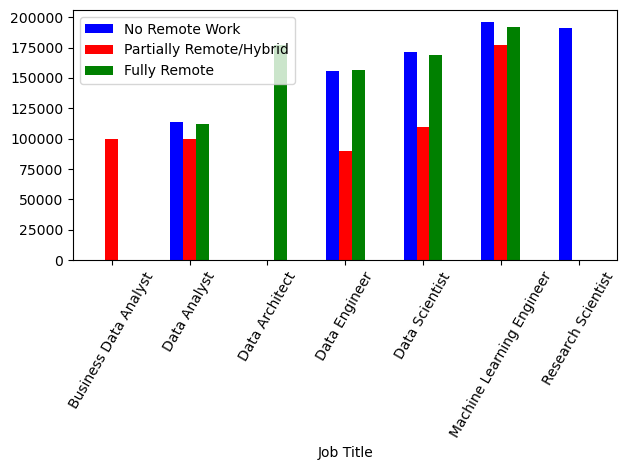

In [81]:
result_pivoted_df.set_index('Job Title').plot.bar(color={'No Remote Work': 'blue',
                                                         'Partially Remote/Hybrid': 'red', 
                                                         'Fully Remote': 'green'}, rot = 60)

plt.tight_layout()

# Save the figure
plt.savefig("jenae/Fig1.png")

plt.show()

In [27]:
# Group by 'remote_ratio' and 'job_title', count occurrences, and reset the index
grouped_size_data = clean_data_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='count')

# Find the top 5 job titles for each level of remote work
top_job_titles = grouped_size_data.sort_values(by='count', ascending=False).groupby('remote_ratio').head(5).reset_index(drop=True)

# Merge with the original DataFrame to get additional information
result_df = pd.merge(top_job_titles, clean_data_df, on=['remote_ratio', 'job_title'], how='inner')

# Display or use the resulting DataFrame as needed
result_df


,remote_ratio,job_title,count,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size
0,0,Data Engineer,1152,2023,SE,FT,130410,USD,130410,US,US,M
1,0,Data Engineer,1152,2023,SE,FT,92000,USD,92000,US,US,M
2,0,Data Engineer,1152,2023,SE,FT,130410,USD,130410,US,US,M
3,0,Data Engineer,1152,2023,SE,FT,92000,USD,92000,US,US,M
4,0,Data Engineer,1152,2023,SE,FT,333500,USD,333500,US,US,M
...,...,...,...,...,...,...,...,...,...,...,...,...
5355,50,Machine Learning Engineer,2,2023,MI,FT,135000,USD,135000,US,US,L
5356,50,Machine Learning Engineer,2,2023,MI,FT,219000,USD,219000,US,US,L
5357,50,Data Analyst,1,2023,EN,FT,100000,USD,100000,US,US,M
5358,50,Product Data Analyst,1,2023,EN,CT,83200,USD,83200,US,US,S


In [65]:
average_salaries_job_title = result_df.groupby(['remote_ratio', 'job_title'])['salary'].mean().reset_index(name='avg_salary_by_job_title')
average_salaries_job_title

,remote_ratio,job_title,avg_salary_by_job_title
0,0,Data Analyst,113975.991974
1,0,Data Engineer,155530.512153
2,0,Data Scientist,171337.408898
3,0,Machine Learning Engineer,196193.050898
4,0,Research Scientist,191260.377193
5,50,Business Data Analyst,99500.000000
6,50,Data Analyst,100000.000000
7,50,Data Engineer,90000.000000
8,50,Machine Learning Engineer,177000.000000
9,50,Product Data Analyst,83200.000000


In [28]:
remote_job_title_counts = result_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='value_counts')
remote_job_title_counts

,remote_ratio,job_title,value_counts
0,0,Data Analyst,623
1,0,Data Engineer,1152
2,0,Data Scientist,944
3,0,Machine Learning Engineer,668
4,0,Research Scientist,228
5,50,Business Data Analyst,2
6,50,Data Analyst,1
7,50,Data Engineer,1
8,50,Machine Learning Engineer,2
9,50,Product Data Analyst,1


In [51]:
count_grouped_data = clean_data_df.groupby(['remote_ratio', 'job_title']).size().reset_index(name='job_title_count')

total_counts = count_grouped_data.groupby('remote_ratio')['job_title_count'].sum().reset_index(name='total_job_title_count')
total_counts

,remote_ratio,total_job_title_count
0,0,5089
1,50,11
2,100,2261


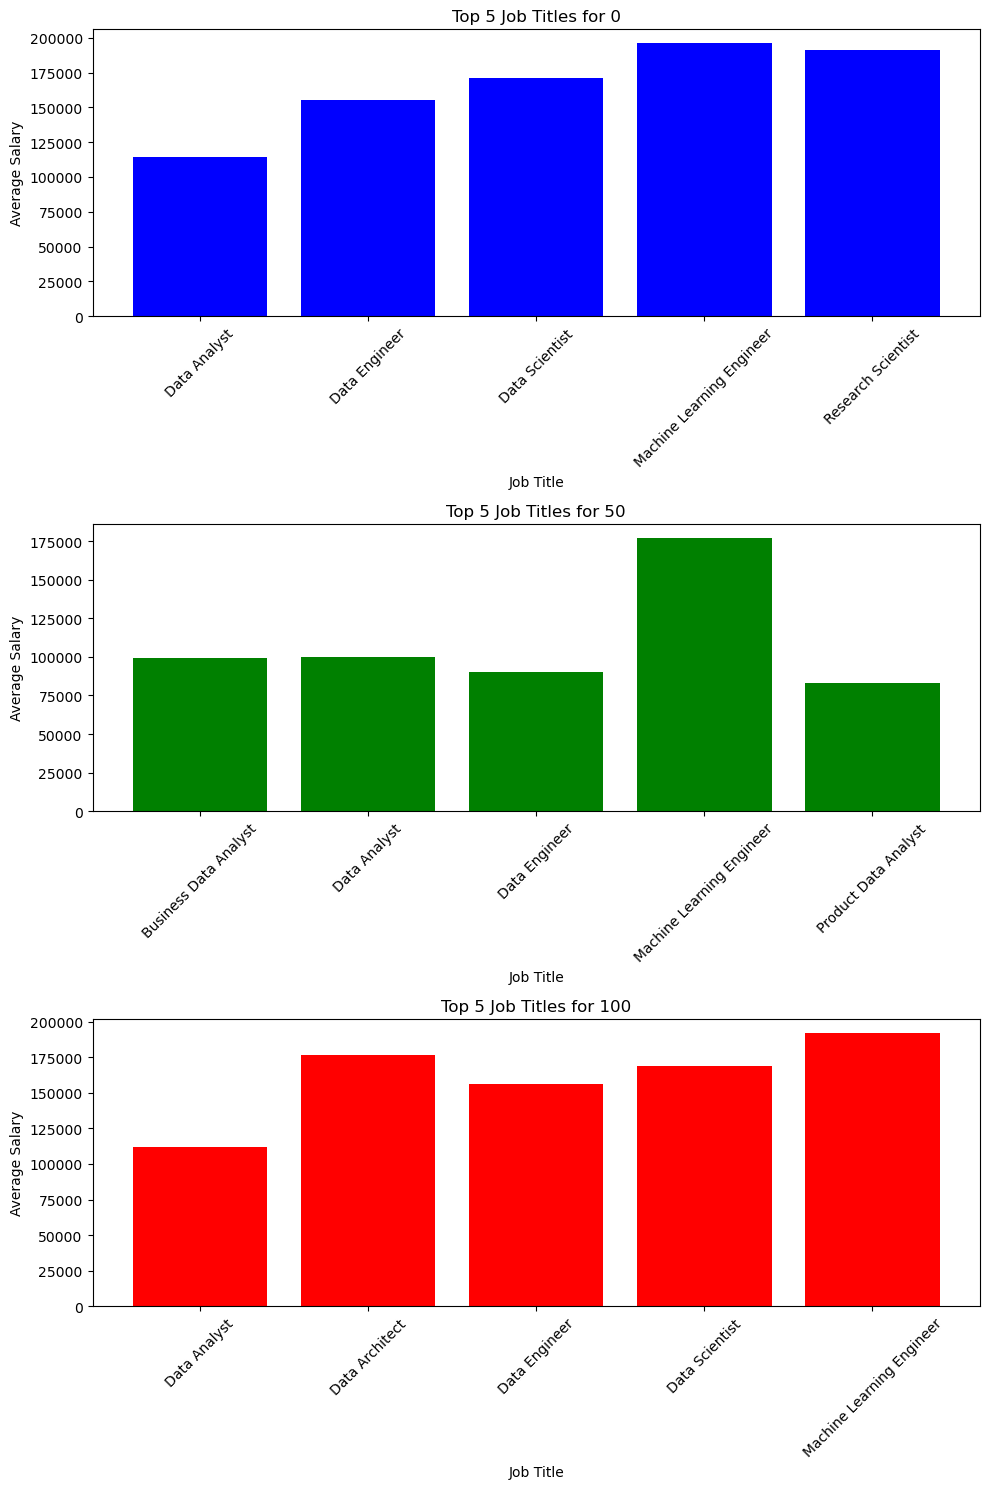

In [77]:
# Get unique company sizes for creating subplots
level_remote_work = average_salaries_job_title['remote_ratio'].unique()

# Create subplots for each company size
fig, axes = plt.subplots(nrows=len(level_remote_work), ncols=1, figsize=(10, 5 * len(level_remote_work)))
bar_colors = ['b', 'g', 'r']

# Plotting for each company size
for i, remote in enumerate(level_remote_work):
    ax = axes[i]
    data_for_size = average_salaries_job_title[average_salaries_job_title['remote_ratio'] == remote]
    ax.bar(data_for_size['job_title'], data_for_size['avg_salary_by_job_title'], color=bar_colors[i])
    ax.set_title(f"Top 5 Job Titles for {remote}")
    ax.set_xlabel("Job Title")
    ax.set_ylabel("Average Salary")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save the figure
plt.savefig("jenae/Fig2.png")

plt.show()